### Utility Maximization Simulation

We consider an investor with **exponential utility** who invests in a single risky asset in a complete market and faces a terminal liability \( F \). We compare two scenarios:

1. **Deterministic liability**: $$F = 0.5$$  
2. **Random liability**: $$F \sim \mathcal{N}(10, 4)$$

The investor seeks to maximize expected utility:
$$
\mathbb{E} \left[ -\exp\left( -\alpha (X_T - F) \right) \right]
$$

---

### Model Setup

- **Asset price dynamics**:
  $$
  \frac{dS_t}{S_t} = b\,dt + \sigma\,dW_t
  $$
- **Wealth process** under constant strategy $$\pi$$:
  $$
  X_T = x_0 + \pi \cdot (b T + \sigma W_T)
  $$
- **Exponential utility function**:
  $$
  U(x) = -\exp(-\alpha x)
  $$
- **Theoretical optimal strategy** (if unconstrained):
  $$
  \pi^* = \frac{b}{\alpha \sigma^2}
  $$

---

## 🔢 Common Simulation Parameters

| Parameter                  | Value         |
|---------------------------|---------------|
| Time horizon $$T$$         | 1.0           |
| Steps $$N$$                | 100           |
| Paths $$M$$                | 10,000        |
| Drift $$b$$                | 0.1           |
| Volatility $$\sigma$$      | 0.2           |
| Risk aversion $$\alpha$$   | 1.0           |
| Initial wealth $$x_0$$     | 1.0           |
| Strategy grid              | $$\pi \in [-4, 10]$$ |

### Case 1: Deterministic Liability

$$
F = 0.5
$$

The investor faces a fixed liability at maturity. This serves as a benchmark case, with no uncertainty in the liability term. The optimal strategy should match the theoretical value $$\pi^*$$ under exponential utility.


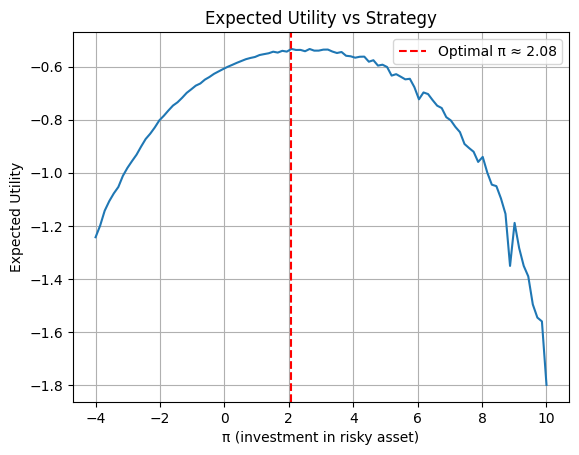

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 1.0
N = 100
dt = T / N
M = 10000  # number of paths

b = 0.1
sigma = 0.2
alpha = 1.0
x0 = 1.0
F = 0.5

theta = b / sigma
pi_values = np.linspace(-4, 10, 100)
expected_utilities = []

for pi in pi_values:
    # Simulate M paths of Brownian motion
    dW = np.random.normal(0, np.sqrt(dt), size=(M, N))
    W = np.cumsum(dW, axis=1)

    # Simulate wealth process under strategy pi
    X_T = x0 + pi * (b * T + sigma * W[:, -1])
    
    # Compute expected utility
    U = -np.exp(-alpha * (X_T - F))
    expected_utilities.append(np.mean(U))

# Find optimal strategy
optimal_idx = np.argmax(expected_utilities)
optimal_pi = pi_values[optimal_idx]

# Plot
plt.plot(pi_values, expected_utilities)
plt.axvline(optimal_pi, color='r', linestyle='--', label=f"Optimal π ≈ {optimal_pi:.2f}")
plt.title("Expected Utility vs Strategy")
plt.xlabel("π (investment in risky asset)")
plt.ylabel("Expected Utility")
plt.legend()
plt.grid(True)
plt.show()


### Case 2: Random Liability

$$
F \sim \mathcal{N}(10, 4)
$$

The investor now faces a stochastic liability that follows a normal distribution. Each simulation path includes a different realization of $$F$$, introducing additional risk into the utility evaluation. This increases aversion to volatility and may impact the shape and position of the optimal strategy.

**the theoretical optimal strategy remains unchanged**:

$$
\pi^* = \frac{b}{\alpha \sigma^2}
$$

However, the value function becomes:

$$
V(x) = - \exp(-\alpha x) \cdot \mathbb{E}[\exp(\alpha F)]
$$

For normally distributed liabilities \( F \sim \mathcal{N}(\mu_F, \sigma_F^2) \), this term evaluates to:

$$
\mathbb{E}[\exp(\alpha F)] = \exp\left( \alpha \mu_F + \frac{1}{2} \alpha^2 \sigma_F^2 \right)
$$



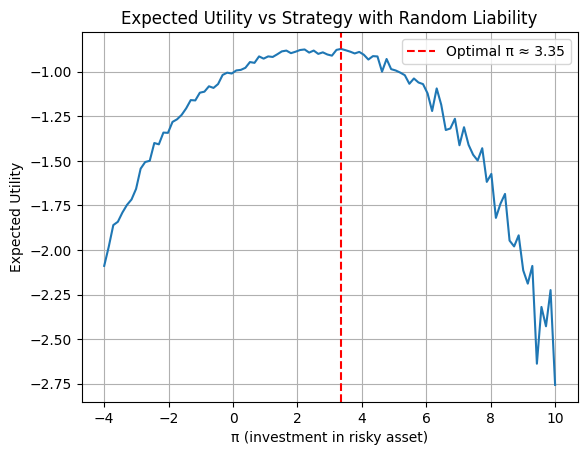

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Time and simulation parameters
T = 1.0
N = 100
dt = T / N
M = 10000

# Market and utility parameters
b = 0.1
sigma = 0.2
alpha = 1.0
x0 = 1.0

# Liability distribution
mu_F = 0.5
sigma_F = 1

# Strategy grid
pi_values = np.linspace(-4, 10, 100)
expected_utilities = []

for pi in pi_values:
    # Simulate Brownian motion paths
    dW = np.random.normal(0, np.sqrt(dt), size=(M, N))
    W = np.cumsum(dW, axis=1)
    
    # Terminal Brownian values
    W_T = W[:, -1]

    # Terminal wealth under strategy pi
    X_T = x0 + pi * (b * T + sigma * W_T)

    # Simulate random liabilities
    F = np.random.normal(mu_F, sigma_F, size=M)

    # Compute expected utility
    U = -np.exp(-alpha * (X_T - F))
    expected_utilities.append(np.mean(U))

# Find optimal strategy
optimal_idx = np.argmax(expected_utilities)
optimal_pi = pi_values[optimal_idx]

# Plot results
plt.plot(pi_values, expected_utilities)
plt.axvline(optimal_pi, color='r', linestyle='--', label=f"Optimal π ≈ {optimal_pi:.2f}")
plt.title("Expected Utility vs Strategy with Random Liability")
plt.xlabel("π (investment in risky asset)")
plt.ylabel("Expected Utility")
plt.legend()
plt.grid(True)
plt.show()
